<img src="images/playvs-league.png" class="inline"/>

**<p><center><font size="6.5">Predicting the Chance of Winning in League of Legends</font></center></p>**
*<p style="color: darkgrey;"><center>Jiaxuan Wu, Yufei Huang, Geng Liu</center></p>*

**<p ><center><font size="7"><font color="SkyBlue">Introduction</font></font></center></p>**
League of Legends (abbreviated LoL) is a multiplayer online battle arena video game developed and published by Riot Games for Microsoft Windows and macOS. Released on October 27, 2009,League of Legends has since grown in popularity, with an active and expansive fanbase. In September 2016, the company estimated that there are over 100 million active players each month.

<img src="images/p480px-Map_of_MOBA.svg.png" class="inline"/> A simplified representation of Summoner's Rift. The yellow paths are the "lanes" where endless waves of troops known as minions march; blue and red dots are the defensive turrets that defend the lanes. Not pictured are the two turrets that flank each Nexus - the ultimate goal of the game, which are within each team's base in their corner. The dotted black line is the river that divides the sides.
LoL has a professional league. The top prize for the best team is over five million dollars and the average player makes a six-figure income. This data set aggregates basic statistics for every game since 2015 across all the professional leagues other than China.

**<p><font size="7"><font color="SkyBlue">Outline</font></font></p>**
<ol>
	<li><font color="SkyBlue"><strong>Getting Started:</strong></font>
	<ol>
		<li><font color="SkyBlue">Required Libraries</font></li>
		<li><font color="SkyBlue">Dataset Source</font></li>
		<li><font color="SkyBlue">Reading Data</font></li>
		<li><font color="SkyBlue">Tidying and Modifying Data</font></li>
	</ol>
	</li>
	<li><font color="SkyBlue"><strong>Exploratory Data Analysis:</strong></font></li>
    <ol>
		<li><font color="SkyBlue">Explore the Frequency of ADC & Support Combo</font></li>
		<li><font color="SkyBlue">Dataset Source</font></li>
		<li><font color="SkyBlue">Reading Data</font></li>
		<li><font color="SkyBlue">Tidying and Modifying Data</font></li>
	</ol>
	</li>
	<li><font color="SkyBlue"><strong>Linear Regression:</strong></font></li>
	<li><font color="SkyBlue"><strong>Predict with Machine Learning:</strong></font></li>
	<li><font color="SkyBlue"><strong>Conclusion:</strong></font></li>
</ol>

**<p><font size="6"><font color="SkyBlue">1. Getting Started</font></font></p>**

**<p><font size="4.5"><font color="SkyBlue">A. Required Libraries</font></font></p>**
<ul>
	<li style="box-sizing: border-box;">Pandas: for data display and partitioning</li>
	<li style="box-sizing: border-box;">Numpy: for scientific computing with Python</li>
	<li style="box-sizing: border-box;">Matplotlib.pyplot: for plotting Pandas data into various graphs and charts</li>
	<li style="box-sizing: border-box;">Seaborn: for graphics on top of Matplotlib</li>
	<li style="box-sizing: border-box;">scikit-learn: machine learning library
	<ul style="box-sizing: border-box; margin: 0em 2em; list-style: square; padding-left: 0px;">
		<li style="box-sizing: border-box;">linear-model:&nbsp;calculate models for multiple linear regression</li>
		<li style="box-sizing: border-box;">model_selection: split up dataset into test and training data and evaluate predictions</li>
	</ul>
	</li>
	<li style="box-sizing: border-box;">statsmodels - api:&nbsp;calculate models and statistics with multple linear regression</li>
</ul>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**<p><font size="4.5"><font color="SkyBlue">B. Dataset Source</font></font></p>**

The dataset we used aggregates basic statistics for every game since 2015 across all the professional leagues other than China. It contains detailed information for all feasible aspects of the performance of each member in a team, such as the number of kills, the time when kills the dragon, the number of golds every minute. In this project we will be concerned with the quantitave rankings of the teams and their ADC & Support Combos.

The dataset was found on Kaggle. 
<a href="https://www.kaggle.com/chuckephron/leagueoflegends">https://www.kaggle.com/chuckephron/leagueoflegends</a>

**<p><font size="4.5"><font color="SkyBlue">C. Reading Data</font></font></p>**

Load .csv file and drop the columns that we do not need, such as "Leagus", "Year", "Season", and "Type". Then, display the first 5 rows to get a sense of what is contained in the dataset. 

In [12]:
df = pd.read_csv("LeagueofLegends.csv", sep=',')
df = df[df['Type'] == 'International']
df.drop(['League', 'Year', 'Season', 'Type'],axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,goldblue,bKills,bTowers,bInhibs,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,EDG,0,1,SSW,44,"[0, 0, 13, -33, 151, -82, 156, 90, -552, 391, ...","[2415, 2415, 2723, 3941, 5324, 6418, 7732, 907...","[[13.729, 'SSW PawN', 'EDG U', ['EDG Clearlove...","[[14.332, 'MID_LANE', 'OUTER_TURRET'], [15.003...",[],...,Zilean,"[475, 475, 532, 802, 1093, 1397, 1612, 1848, 2...",imp,Tristana,"[475, 475, 532, 825, 1140, 1400, 1683, 2001, 2...",Mata,Nami,"[515, 515, 582, 737, 909, 1075, 1220, 1409, 15...","['Twitch', 'Ryze', 'Janna']",http://matchhistory.na.leagueoflegends.com/en/...
1,TSM,1,0,SK,24,"[40, 40, 44, 144, 23, 668, 706, 928, 1017, 151...","[2415, 2415, 2711, 3977, 5274, 7067, 8249, 956...","[[4.76, 'SK Jesiz', 'TSM Amazing', ['TSM Bjerg...","[[18.384, 'BOT_LANE', 'OUTER_TURRET'], [20.303...",[],...,Orianna,"[475, 475, 532, 830, 1189, 1371, 1585, 1809, 2...",CandyPanda,Lucian,"[475, 475, 532, 811, 1112, 1410, 1683, 2028, 2...",nRated,Sona,"[475, 475, 539, 680, 826, 982, 1122, 1274, 141...","['Lulu', 'Zed', 'Syndra']",http://matchhistory.na.leagueoflegends.com/en/...
2,DP,0,1,AHQ,41,"[0, 0, 6, -37, -3, 101, 200, 97, -490, -128, -...","[2415, 2415, 2711, 3824, 5183, 6445, 7596, 889...","[[8.892, 'AHQ Prydz', 'DP fabFabulous', ['DP C...","[[25.958, 'TOP_LANE', 'OUTER_TURRET'], [36.42,...",[],...,Fizz,"[475, 475, 532, 788, 1103, 1391, 1588, 1933, 2...",GarnetDevil,Lucian,"[475, 475, 532, 844, 1150, 1443, 1727, 1969, 2...",GreenTea,Thresh,"[515, 515, 577, 709, 900, 1050, 1203, 1343, 15...","['Alistar', 'Ryze', 'Zilean']",http://matchhistory.na.leagueoflegends.com/en/...
3,TPA,0,1,SHR,57,"[-40, -50, -55, -126, 411, 466, 134, 107, -298...","[2415, 2425, 2726, 3832, 5488, 6679, 7968, 906...","[[3.581, 'SHR corn', 'TPA Winds', ['TPA Achie'...","[[17.036, 'TOP_LANE', 'OUTER_TURRET'], [44.198...",[],...,Orianna,"[475, 475, 533, 835, 1050, 1373, 1722, 1968, 2...",Uzi,Caitlyn,"[475, 475, 533, 830, 1184, 1499, 1931, 2175, 2...",Zero,Nami,"[515, 535, 609, 784, 962, 1125, 1369, 1507, 18...","['Alistar', 'Nidalee', 'Zilean']",http://matchhistory.na.leagueoflegends.com/en/...
4,SSW,1,0,AHQ,23,"[0, 0, 1798, 1780, 2475, 2704, 4124, 3899, 542...","[2415, 2415, 4858, 5898, 7717, 8933, 11348, 12...","[[1.212, 'AHQ NAZ', 'SSW imp', ['SSW Looper', ...","[[10.868, 'TOP_LANE', 'OUTER_TURRET'], [19.722...","[[21.983, 'BOT_LANE'], [19.576, 'TOP_LANE']]",...,TwistedFate,"[475, 475, 561, 779, 1077, 1318, 1520, 1926, 2...",GarnetDevil,Jinx,"[475, 475, 561, 841, 1111, 1321, 1515, 1843, 2...",GreenTea,Blitzcrank,"[515, 515, 620, 764, 920, 1049, 1209, 1334, 14...","['Alistar', 'Ryze', 'Zilean']",http://matchhistory.na.leagueoflegends.com/en/...


**<p><font size="4.5"><font color="SkyBlue">D. Tidying and Modifying Data</font></font></p>**

To better explore the data, convert all strings to intergers, lists, or what the type the columns need.

In [3]:
# Convert String into lists in the table
from ast import literal_eval
df['goldblue'] = df['goldblue'].apply(literal_eval)
df['bKills'] = df['bKills'].apply(literal_eval)
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['bDragons'] = df['bDragons'].apply(literal_eval)
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['bHeralds'] = df['bHeralds'].apply(literal_eval)

df['goldred'] = df['goldred'].apply(literal_eval)
df['rKills'] = df['rKills'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)

df['goldblueTop'] = df['goldblueTop'].apply(literal_eval)
df['goldblueJungle'] = df['goldblueJungle'].apply(literal_eval)
df['goldblueMiddle'] = df['goldblueMiddle'].apply(literal_eval)
df['goldblueADC'] = df['goldblueADC'].apply(literal_eval)
df['goldblueSupport'] = df['goldblueSupport'].apply(literal_eval)

df['goldredTop'] = df['goldredTop'].apply(literal_eval)
df['goldredJungle'] = df['goldredJungle'].apply(literal_eval)
df['goldredMiddle'] = df['goldredMiddle'].apply(literal_eval)
df['goldredADC'] = df['goldredADC'].apply(literal_eval)
df['goldredSupport'] = df['goldredSupport'].apply(literal_eval)

To better understand the data, re-format player name to "team-name player-name"

In [4]:
df['redTop'] = df['redTeamTag'] + ' ' + df['redTop']
df['redJungle'] = df['redTeamTag'] + ' ' + df['redJungle']
df['redMiddle'] = df['redTeamTag'] + ' ' + df['redMiddle']
df['redADC'] = df['redTeamTag'] + ' ' + df['redADC']
df['redSupport'] = df['redTeamTag'] + ' ' + df['redSupport']

df['blueTop'] = df['blueTeamTag'] + ' ' + df['blueTop']
df['blueJungle'] = df['blueTeamTag'] + ' ' + df['blueJungle']
df['blueMiddle'] = df['blueTeamTag'] + ' ' + df['blueMiddle']
df['blueADC'] = df['blueTeamTag'] + ' ' + df['blueADC']
df['blueSupport'] = df['blueTeamTag'] + ' ' + df['blueSupport']

Since we need the statistics of each team, we ignore teams' different tags (red or blue). We will only emphasize the information of each team.

Isolate the red team and blue team separately. Then, rename the columns without team tags. After that, with the same columns name, we can merge two dataframe into one. Now, we have the information of all teams in one table.

In [5]:
df_red = df.copy(deep=True)
df_blue = df.copy(deep=True)
df_red.drop(columns = ['blueTeamTag', 'bResult', 'goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons',\
                       'bBarons', 'bHeralds', 'blueTop', 'blueTopChamp', 'goldblueTop', \
                       'blueJungle', 'blueJungleChamp', 'goldblueJungle', 'blueMiddle', \
                       'blueMiddleChamp', 'goldblueMiddle', 'blueADC', 'blueADCChamp', 'goldblueADC', \
                       'blueSupport', 'blueSupportChamp', 'goldblueSupport', 'blueBans'], inplace=True)
df_blue.drop(columns = ['redTeamTag', 'rResult', 'goldred', 'rKills', 'rTowers', 'rInhibs', 'rDragons',\
                       'rBarons', 'rHeralds', 'redTop', 'redTopChamp', 'goldredTop', \
                       'redJungle', 'redJungleChamp', 'goldredJungle', 'redMiddle', \
                       'redMiddleChamp', 'goldredMiddle', 'redADC', 'redADCChamp', 'goldredADC', \
                       'redSupport', 'redSupportChamp', 'goldredSupport', 'redBans'], inplace=True)

df_red.rename({'redTeamTag': 'teamTag',\
               'rResult': 'result',\
               'goldred': 'gold',\
               'rKills': 'kills',\
               'rTowers': 'towers',\
               'rInhibs': 'inhibs',\
               'rDragons': 'dragons',\
               'rBarons': 'barons',\
               'rHeralds': 'heralds',\
               'redTop': 'top', \
               'redTopChamp': 'topChamp',\
               'goldredTop': 'goldTop',\
               'redJungle': 'jungle',\
               'redJungleChamp': 'jungleChamp',\
               'goldredJungle': 'goldJungle',\
               'redMiddle': 'middle', \
               'redMiddleChamp': 'middleChamp',\
               'goldredMiddle': 'goldMiddle',\
               'redADC': 'ADC',\
               'redADCChamp': 'ADCChamp',\
               'goldredADC': 'goldADC', \
               'redSupport': 'support',\
               'redSupportChamp': 'supportChamp',\
               'goldredSupport': 'goldSupport',\
               'redBans': 'bans'}, inplace=True, axis='columns')

df_blue.rename({'blueTeamTag': 'teamTag',\
               'bResult': 'result',\
               'goldblue': 'gold',\
               'bKills': 'kills',\
               'bTowers': 'towers',\
               'bInhibs': 'inhibs',\
               'bDragons': 'dragons',\
               'bBarons': 'barons',\
               'bHeralds': 'heralds',\
               'blueTop': 'top', \
               'blueTopChamp': 'topChamp',\
               'goldblueTop': 'goldTop',\
               'blueJungle': 'jungle',\
               'blueJungleChamp': 'jungleChamp',\
               'goldblueJungle': 'goldJungle',\
               'blueMiddle': 'middle', \
               'blueMiddleChamp': 'middleChamp',\
               'goldblueMiddle': 'goldMiddle',\
               'blueADC': 'ADC',\
               'blueADCChamp': 'ADCChamp',\
               'goldblueADC': 'goldADC', \
               'blueSupport': 'support',\
               'blueSupportChamp': 'supportChamp',\
               'goldblueSupport': 'goldSupport',\
               'blueBans': 'bans'}, inplace=True, axis='columns')

df_all = pd.concat([df_red, df_blue], sort = False).reset_index()
df_all

,index,result,teamTag,gamelength,golddiff,gold,kills,towers,inhibs,dragons,...,middleChamp,goldMiddle,ADC,ADCChamp,goldADC,support,supportChamp,goldSupport,bans,Address
0,0,1,SSW,44,"[0, 0, 13, -33, 151, -82, 156, 90, -552, 391, ...","[2415, 2415, 2710, 3974, 5173, 6500, 7576, 898...","[[7.963, EDG Koro1, SSW Dandy, [SSW Looper, SS...","[[43.778, MID_LANE, NEXUS_TURRET], [43.215, TO...","[[43.302, TOP_LANE], [40.195, BOT_LANE]]","[[21.197, None], [28.368, None], [15.015, None]]",...,Zilean,"[475, 475, 532, 802, 1093, 1397, 1612, 1848, 2...",SSW imp,Tristana,"[475, 475, 532, 825, 1140, 1400, 1683, 2001, 2...",SSW Mata,Nami,"[515, 515, 582, 737, 909, 1075, 1220, 1409, 15...","['Twitch', 'Ryze', 'Janna']",http://matchhistory.na.leagueoflegends.com/en/...
1,1,0,SK,24,"[40, 40, 44, 144, 23, 668, 706, 928, 1017, 151...","[2375, 2375, 2667, 3833, 5251, 6399, 7543, 864...","[[9.137, TSM Amazing, SK CandyPanda, [SK Giliu...","[[20.319, BOT_LANE, OUTER_TURRET]]",[],[],...,Orianna,"[475, 475, 532, 830, 1189, 1371, 1585, 1809, 2...",SK CandyPanda,Lucian,"[475, 475, 532, 811, 1112, 1410, 1683, 2028, 2...",SK nRated,Sona,"[475, 475, 539, 680, 826, 982, 1122, 1274, 141...","['Lulu', 'Zed', 'Syndra']",http://matchhistory.na.leagueoflegends.com/en/...
2,2,1,AHQ,41,"[0, 0, 6, -37, -3, 101, 200, 97, -490, -128, -...","[2415, 2415, 2705, 3861, 5186, 6344, 7396, 880...","[[7.356, DP HolyPhoenix, AHQ GarnetDevil, [AHQ...","[[39.833, MID_LANE, NEXUS_TURRET], [22.234, MI...","[[39.864, MID_LANE], [35.386, MID_LANE], [38.0...","[[17.617, None], [25.692, None], [10.981, None...",...,Fizz,"[475, 475, 532, 788, 1103, 1391, 1588, 1933, 2...",AHQ GarnetDevil,Lucian,"[475, 475, 532, 844, 1150, 1443, 1727, 1969, 2...",AHQ GreenTea,Thresh,"[515, 515, 577, 709, 900, 1050, 1203, 1343, 15...","['Alistar', 'Ryze', 'Zilean']",http://matchhistory.na.leagueoflegends.com/en/...
3,3,1,SHR,57,"[-40, -50, -55, -126, 411, 466, 134, 107, -298...","[2455, 2475, 2781, 3958, 5077, 6213, 7834, 895...","[[13.005, TPA Achie, SHR inSec, [SHR Cola], 91...","[[51.917, BOT_LANE, BASE_TURRET], [54.448, MID...","[[52.028, BOT_LANE], [56.153, BOT_LANE], [54.5...","[[52.372, None], [33.464, None], [41.306, None]]",...,Orianna,"[475, 475, 533, 835, 1050, 1373, 1722, 1968, 2...",SHR Uzi,Caitlyn,"[475, 475, 533, 830, 1184, 1499, 1931, 2175, 2...",SHR Zero,Nami,"[515, 535, 609, 784, 962, 1125, 1369, 1507, 18...","['Alistar', 'Nidalee', 'Zilean']",http://matchhistory.na.leagueoflegends.com/en/...
4,4,0,AHQ,23,"[0, 0, 1798, 1780, 2475, 2704, 4124, 3899, 542...","[2415, 2415, 3060, 4118, 5242, 6229, 7224, 861...","[[1.285, SSW Mata, AHQ Prydz, [AHQ NAZ, AHQ we...",[],[],[],...,TwistedFate,"[475, 475, 561, 779, 1077, 1318, 1520, 1926, 2...",AHQ GarnetDevil,Jinx,"[475, 475, 561, 841, 1111, 1321, 1515, 1843, 2...",AHQ GreenTea,Blitzcrank,"[515, 515, 620, 764, 920, 1049, 1209, 1334, 14...","['Alistar', 'Ryze', 'Zilean']",http://matchhistory.na.leagueoflegends.com/en/...
5,5,0,TSM,31,"[-40, -40, -40, -114, 105, 73, 70, -36, -98, -...","[2455, 2455, 2756, 4016, 5279, 6475, 7751, 918...","[[17.638, SHR Cola, TSM WildTurtle, [TSM Lustb...","[[12.764, MID_LANE, OUTER_TURRET], [20.054, TO...",[],"[[25.433, None]]",...,Zed,"[475, 475, 533, 812, 1137, 1473, 1790, 2110, 2...",TSM WildTurtle,Corki,"[475, 475, 533, 803, 1045, 1240, 1577, 1857, 2...",TSM Lustboy,Nami,"[515, 515, 584, 753, 906, 1076, 1262, 1451, 16...","['Fizz', 'LeeSin', 'Lucian']",http://matchhistory.na.leagueoflegends.com/en/...
6,6,0,SK,44,"[80, 80, 572, 677, 894, 673, 920, 1076, 899, 1...","[2375, 2375, 2680, 3875, 4992, 6353, 7366, 846...","[[8.25, TPA Morning, SK Jesiz, [SK Gilius], 66...","[[35.977, MID_LANE, INNER_TURRET], [14.262, TO...",[],"[[28.891, None], [16.326, None], [9.39, None],...",...,Ahri,"[475, 475, 532, 784, 1056, 1311, 1560, 1791, 2...",SK CandyPanda,Tristana,"[475, 475, 532, 775, 1094, 1439, 1708, 1992, 2...",SK nRated,Sona,"[475, 475, 552, 706, 865, 1010, 1136, 1282, 14...","['Zilean', 'Alistar', 'LeeSin']",http://m

**<p><font size="6"><font color="SkyBlue">2. Exploratory Data Analysis</font></font></p>**

**<p><font size="4.5"><font color="SkyBlue">A. Explore the Frequency of ADC & Support Combo</font></font></p>**

To find the frequency of all possible ADC & Support combos that every team used, we will need a list of all combos, and a list of how many teams are listed at each.

First, we will use Pandas groupby() to combine all the rows with the same combo.

In [6]:
df_combo = df_all.groupby(['ADCChamp', 'supportChamp']).agg({'result' :  'sum',
                                                             'ADC' : 'count',}).reset_index()
combo_size = df_all.shape[0]
df_combo.rename({'ADC':'frequency'}, inplace=True, axis='columns')
df_combo['winRatio'] = df_combo['result'] / df_combo['frequency']
df_combo['frequency'].unique()

array([ 8,  4,  1,  9, 10,  6,  2,  5,  3, 14, 11, 17,  7, 18, 15, 22, 13,
       20, 16, 19, 31, 23, 24, 21, 12])

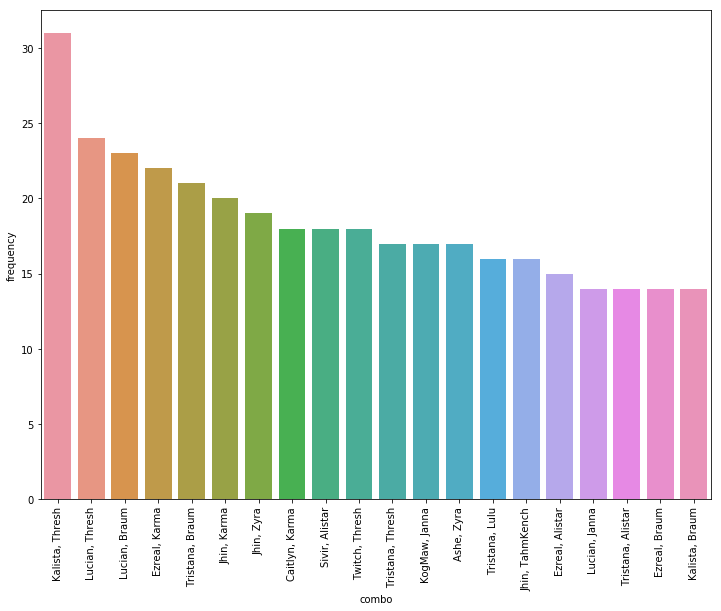

In [7]:
df_combo['combo'] = df_combo['ADCChamp'] + ', ' + df_combo['supportChamp']
df_combo.sort_values(by='frequency', inplace=True, ascending=False)
df_combo_top = df_combo.head(20)
type(df_combo_top)

f, ax = plt.subplots(figsize=(12,9))
freq_map = sns.barplot(x='combo', y='frequency', data=df_combo_top )
freq_map.set_xticklabels(freq_map.get_xticklabels(),rotation=90)
plt.show()

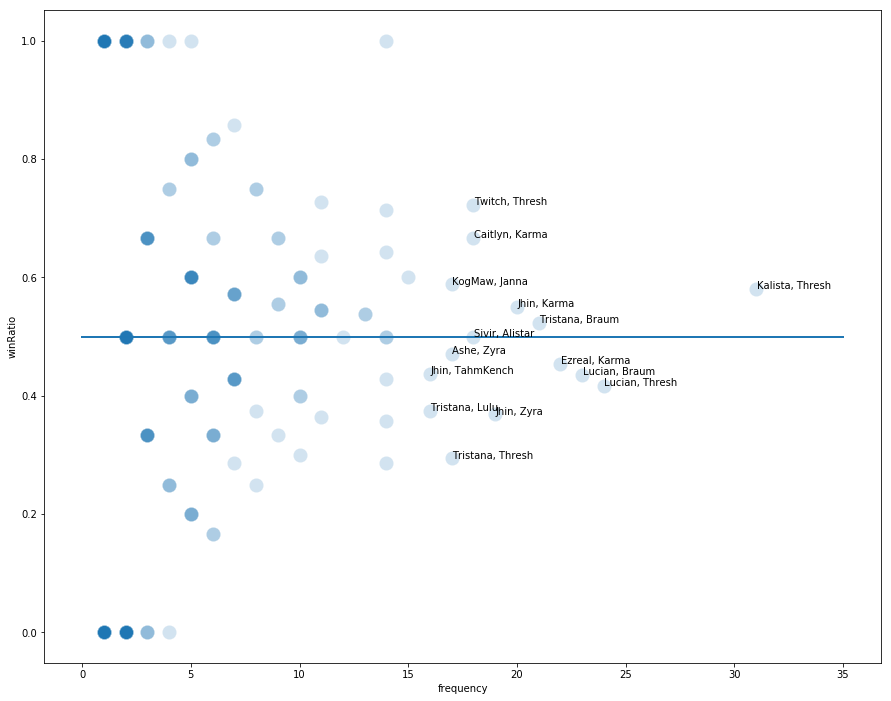

In [8]:
df_combo['winOverall'] = df_combo['result']/combo_size
df_combo['frequenceOverall'] = df_combo['frequency']/combo_size

f, ax = plt.subplots(figsize=(15,12))
combo_win = sns.scatterplot(x='frequency', y='winRatio', data=df_combo, alpha=0.2, s=200, palette=sns.color_palette("RdBu", n_colors=7), ax=ax)


for i, r in df_combo.iterrows():
    if (r['frequency'] > 15):
        ax.text(r['frequency'] + 0.02, r['winRatio'], r['combo'])
plt.plot([0, 35], [0.5, 0.5], linewidth=2)
plt.show()

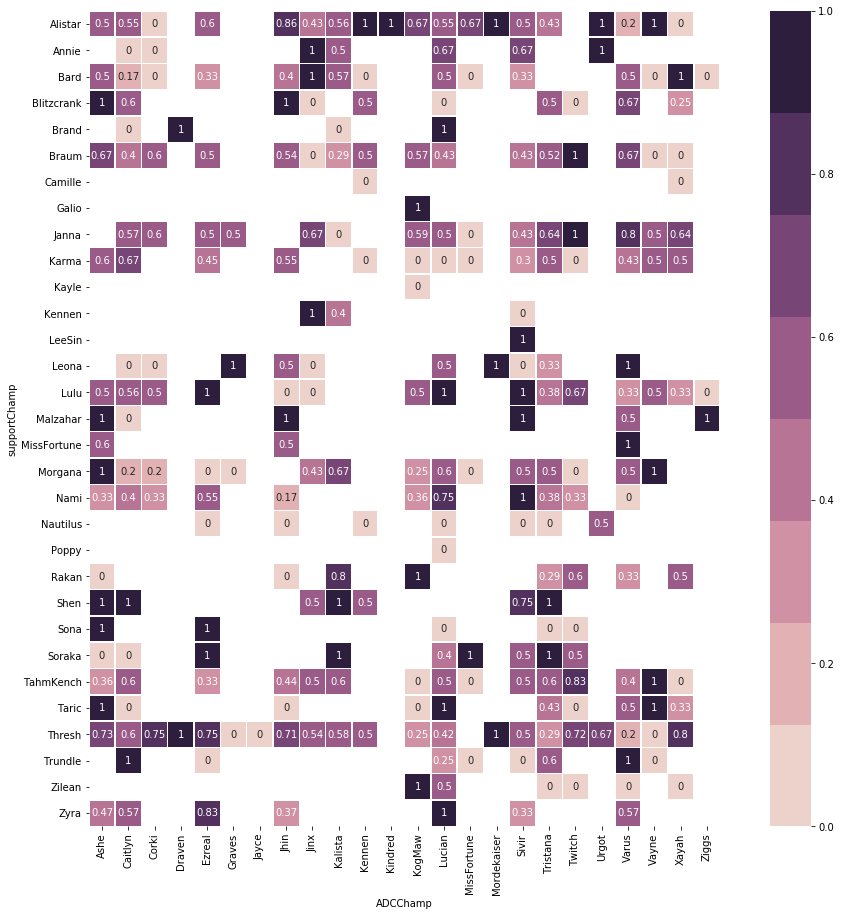

In [9]:
cmap = sns.diverging_palette(220,10, as_cmap=True)

pivot = df_combo.pivot(index='supportChamp', columns='ADCChamp', values='winRatio')
f, ax = plt.subplots(figsize=(18,15))
combo_win = sns.heatmap(pivot, cmap=sns.cubehelix_palette(8), square=True, linewidths=0.5, ax=ax, annot=True)
plt.show()

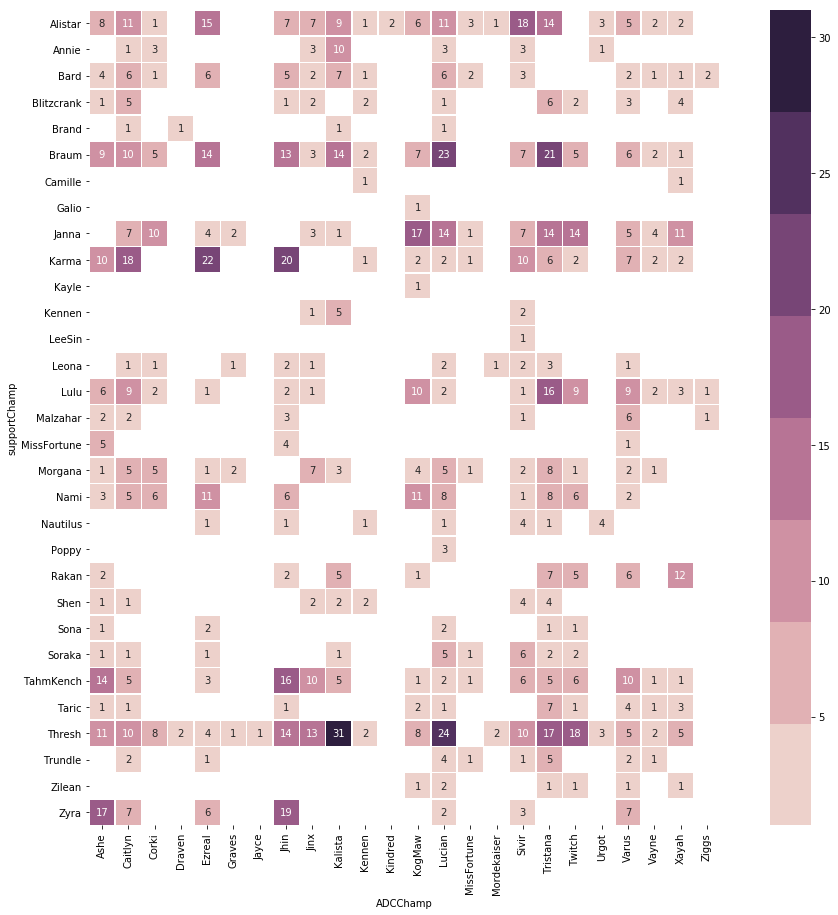

In [10]:
cmap = sns.diverging_palette(220,10, as_cmap=True)

pivot = df_combo.pivot(index='supportChamp', columns='ADCChamp', values='frequency')
f, ax = plt.subplots(figsize=(18,15))
combo_win = sns.heatmap(pivot, cmap=sns.cubehelix_palette(8), square=True, linewidths=0.5, ax=ax, annot=True)
plt.show()

#### ADC and Support Combo and Gold

In [11]:
df_gold = df_all.copy(deep=True)
df_gold = df_gold[['result','ADCChamp', 'goldADC', 'supportChamp', 'goldSupport']]

df_gold.loc[0]

ADC                                                       SSW imp
ADCChamp                                                 Tristana
goldADC         [475, 475, 532, 825, 1140, 1400, 1683, 2001, 2...
support                                                  SSW Mata
supportChamp                                                 Nami
goldSupport     [515, 515, 582, 737, 909, 1075, 1220, 1409, 15...
Name: 0, dtype: object

In [ ]:
df_gold['goldBot'] = np.empty((len(df_gold), 0)).tolist()

for i, r in df_gold.iterrows():
    lst = [sum(pair) for pair in zip(r['goldADC'], r['goldSupport'])]
    df_gold.at[i, 'goldBot'] = lst
    df_gold.at[i, 'goldBotPerMin'] = sum(lst)/len(lst)

df_gold['combo'] = df_gold['ADCChamp'] + ', ' + df_gold['supportChamp']

In [ ]:
df_gold

In [ ]:
f,ax = plt.subplots(figsize=(18,15))
adc_gold_per_min = sns.stripplot(x='ADCChamp', y='goldBotPerMin', data=df_gold, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)

plt.show()

In [ ]:
df_gold

In [ ]:

df_gold = df_all.groupby(['ADCChamp', 'supportChamp']).agg({'result' :  'sum',
                                                             'ADC' : 'count',}).reset_index()
combo_size = df_all.shape[0]
df_combo.rename({'ADC':'frequency'}, inplace=True, axis='columns')
df_combo['winRatio'] = df_combo['result'] / df_combo['frequency']
df_combo['frequency'].unique()